In [112]:
#!/usr/bin/env python

from collections import deque
import time
import random
import os

import numpy as np
import cv2
import gym
import h5py

# ROS packages required
import rospy
import rospkg

from keras.models import load_model

from neuroracer_gym.tasks import neuroracer_discrete_task

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
rospy.init_node('neuroracer_qlearn', anonymous=True, log_level=rospy.INFO)
NeuroRacer(Agent, 100).run()

<type 'classobj'>


/home/s0562411/.local/lib/python2.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
[ERROR] [1558180539.478279, 0.000000]: SIMULATION RESET
[ERROR] [1558180539.483784, 0.000000]: NOT Initialising Simulation Physics Parameters
[WARN] [1558180539.497489, 0.000000]: Start Init ControllersConnection
[WARN] [1558180539.501891, 0.000000]: END Init ControllersConnection


WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
[INFO] [1558180540.889601, 1.374000]: State size
[INFO] [1558180540.890724, 1.374000]: (56, 128, 8)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 56, 128, 16)       1168      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 56, 128, 16)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 64, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 64, 32)        4640      
_________________________________________________________________
leaky_re_l

[WARN] [1558180541.188677, 1.374000]: DONT RESET CONTROLLERS
[ERROR] [1558180541.206211, 1.387000]: SIMULATION RESET
[WARN] [1558180541.246636, 0.033000]: PUBLISHING REWARD...
[WARN] [1558180541.247829, 0.033000]: PUBLISHING REWARD...DONE=0,EP=0


[INFO] [1558180547.214201, 4.511000]: Episode 0 of 10000
[INFO] [1558180547.215571, 4.511000]: total steps 35, reward -126.138630227/-126.138630227
[INFO] [1558180547.216390, 4.511000]: Episode time 0:00:06, total 0:00:06
[INFO] [1558180547.217205, 4.511000]: exploration_rate 0.85


[WARN] [1558180547.218172, 4.511000]: DONT RESET CONTROLLERS
[ERROR] [1558180547.255001, 4.545000]: SIMULATION RESET
[WARN] [1558180547.307243, 0.042000]: PUBLISHING REWARD...
[WARN] [1558180547.308240, 0.042000]: PUBLISHING REWARD...DONE=-126.13863022669412,EP=1


[INFO] [1558180551.702157, 4.124000]: Episode 1 of 10000
[INFO] [1558180551.703089, 4.124000]: total steps 31, reward -230.27945103/-126.138630227
[INFO] [1558180551.703680, 4.124000]: Episode time 0:00:04, total 0:00:10
[INFO] [1558180551.704248, 4.124000]: exploration_rate 0.85


[WARN] [1558180551.704942, 4.124000]: DONT RESET CONTROLLERS
[ERROR] [1558180551.721507, 4.138000]: SIMULATION RESET
[WARN] [1558180551.762184, 0.034000]: PUBLISHING REWARD...
[WARN] [1558180551.763365, 0.034000]: PUBLISHING REWARD...DONE=-230.27945102998504,EP=2


[INFO] [1558180556.593167, 4.517000]: Replaying...
[INFO] [1558180558.176393, 4.517000]: Model saved
[INFO] [1558180558.353996, 4.517000]: Replay time 1.76079583168


ROSInterruptException: ROS shutdown request

[  0.           0.30384048   0.7          1.21652882   1.89
   2.76809899   3.913        5.40576828   7.3521       9.88980608
  13.19857     17.51267034  23.137569    30.47153958  40.0338673
  52.50161728  68.75757441  89.95274937 117.5878765  153.61967394]


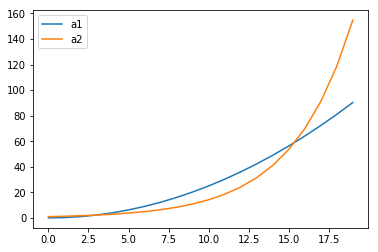

In [53]:
a1 = np.array(range(20))/2.0
a2 = np.empty(20)
a2.fill(1.7)
a2 = np.power(a2, a1)
a1=a1**2
a1
plt.plot((a1), label='a1')

plt.plot((a2), label='a2')
plt.legend()
print(a2-1)

In [2]:
rospy.init_node('neuroracer_qlearn', anonymous=True, log_level=rospy.INFO)
env = gym.make('NeuroRacer-v0')

[ERROR] [1557486780.747457, 0.000000]: SIMULATION RESET
[ERROR] [1557486780.751473, 21.265000]: NOT Initialising Simulation Physics Parameters
[WARN] [1557486780.754523, 0.002000]: Start Init ControllersConnection
[WARN] [1557486780.755211, 0.002000]: END Init ControllersConnection


WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.


In [3]:
env.initial_position = {'p_x': np.random.uniform(1,4), 'p_y': 3.7, 'p_z': 0.05, 'o_x': 0, 'o_y': 0.0, 'o_z': np.random.uniform(0.4,1), 'o_w': 0.855}
# env.initial_position = None
state = env.reset()



[WARN] [1557482408.398122, 0.860000]: DONT RESET CONTROLLERS
[ERROR] [1557482408.443381, 0.882000]: SIMULATION RESET
[WARN] [1557482408.498588, 0.028000]: PUBLISHING REWARD...
[WARN] [1557482408.499522, 0.028000]: PUBLISHING REWARD...DONE=0,EP=0


In [43]:
rd = np.clip(ranges[170:180].mean(), None, 10)
ld = np.clip(ranges[910:920].mean(), None, 10)
print(ld,rd)

(2.2677903, 2.1637309)


In [46]:
np.clip(ranges[525:535].mean(), None, 10)

0.31261867

In [138]:
img_y_offset = 200
img_y_scale = 0.2
img_x_scale = 0.2
def preprocess(img):
    return cv2.resize(cv2.cvtColor(img[img_y_offset:,:], cv2.COLOR_RGB2GRAY), None, fx=img_x_scale, fy=img_y_scale, interpolation=cv2.INTER_LINEAR)/255.0

class PolarRay:
    def __init__(self, n_rays, min_angle, max_angle):
        self.min_a = min_angle
        self.max_a = max_angle
        self.n = n_rays
        self.l = np.abs(min_angle) + np.abs(max_angle)
        self.lh = self.l/2
        
    def ray_to_rad(self, ray_idx):
        return (self.lh-ray_idx*self.l/self.n)

    def ray_to_degree(self, ray_idx):
        return self.ray_to_rad(ray_idx)*180/np.pi

    def degree_to_ray(self, degree):
        return np.round((self.lh - degree*np.pi/180.0)*self.n/self.l).astype(np.int32)

In [139]:
pr = PolarRay(1081, -2.3561944902, 2.3561944902)
pr.degree_to_ray(-90)

901

In [6]:
img = env.reset()
states = deque(maxlen=4)
for i in range(4):
    states.append(preprocess(img))


[WARN] [1557334807.046944, 1.014000]: DONT RESET CONTROLLERS
[ERROR] [1557334807.075234, 1.037000]: SIMULATION RESET
[WARN] [1557334807.122060, 0.031000]: PUBLISHING REWARD...
[WARN] [1557334807.123078, 0.031000]: PUBLISHING REWARD...DONE=0,EP=1


In [14]:
model = load_model('model_0.h5')
# model = load_model('neuroracer.h5')

In [15]:
img = env.reset()
states = deque(maxlen=4)
for i in range(4):
    states.append(preprocess(img))
done = False
trail=0
while trail<3:
    action = np.argmax(model.predict(np.expand_dims(np.stack(states, axis=2), axis=0))[0])
    img, reward, done, _ = env.step(action)
    states.append(preprocess(img))
    if done:
        trail+=1
        done = False
        img = env.reset()
        for i in range(4):
            states.append( preprocess(img))

[WARN] [1557486607.938999, 43.515000]: DONT RESET CONTROLLERS
[ERROR] [1557486607.991563, 43.552000]: SIMULATION RESET
[WARN] [1557486608.046473, 0.029000]: PUBLISHING REWARD...
[WARN] [1557486608.047281, 0.029000]: PUBLISHING REWARD...DONE=1469.2234357595444,EP=21
[WARN] [1557486680.622176, 41.253000]: DONT RESET CONTROLLERS
[ERROR] [1557486680.662997, 41.276000]: SIMULATION RESET
[WARN] [1557486680.720149, 0.031000]: PUBLISHING REWARD...
[WARN] [1557486680.721082, 0.031000]: PUBLISHING REWARD...DONE=608.471670538187,EP=22
[WARN] [1557486745.341491, 36.961000]: DONT RESET CONTROLLERS
[ERROR] [1557486745.378814, 36.976000]: SIMULATION RESET
[WARN] [1557486745.437546, 0.032000]: PUBLISHING REWARD...
[WARN] [1557486745.438512, 0.032000]: PUBLISHING REWARD...DONE=972.3936747610569,EP=23


KeyboardInterrupt: 

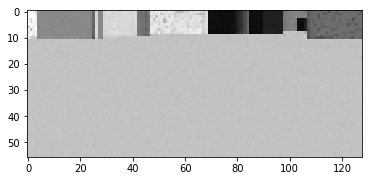

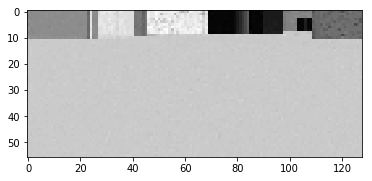

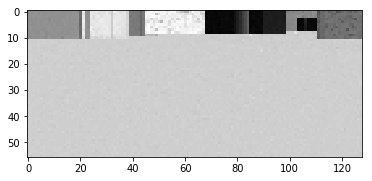

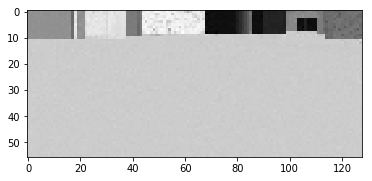

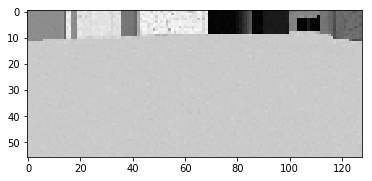

In [9]:
# env.set_sleep_rate(100)
# env.number_of_sleeps = 10
# env.speed = 1

# img = env.reset()
# plt.figure()
# plt.imshow(img)

# for i in range(10):
img, reward, done, _ = env.step(1)

states = deque(maxlen=4)

plt.figure()
src = cv2.cvtColor(img[200:,:], cv2.COLOR_RGB2GRAY)
img1 = cv2.resize(src, None, fx = 0.2, fy = 0.2, interpolation = cv2.INTER_LINEAR )
plt.imshow(img1, cmap='gray')
states.append(img1)

img, reward, done, _ = env.step(1)
img, reward, done, _ = env.step(1)
img, reward, done, _ = env.step(1)
img, reward, done, _ = env.step(1)
plt.figure()
src = cv2.cvtColor(img[200:,:], cv2.COLOR_RGB2GRAY)
img1 = cv2.resize(src, None, fx = 0.2, fy = 0.2, interpolation = cv2.INTER_LINEAR )
plt.imshow(img1, cmap='gray')
states.append(img1)

img, reward, done, _ = env.step(1)
img, reward, done, _ = env.step(1)
img, reward, done, _ = env.step(1)
img, reward, done, _ = env.step(1)
plt.figure()
src = cv2.cvtColor(img[200:,:], cv2.COLOR_RGB2GRAY)
img1 = cv2.resize(src, None, fx = 0.2, fy = 0.2, interpolation = cv2.INTER_LINEAR )
states.append(img1)

plt.imshow(img1, cmap='gray')
img, reward, done, _ = env.step(1)
img, reward, done, _ = env.step(1)
img, reward, done, _ = env.step(1)
img, reward, done, _ = env.step(1)
plt.figure()
src = cv2.cvtColor(img[200:,:], cv2.COLOR_RGB2GRAY)
img1 = cv2.resize(src, None, fx = 0.2, fy = 0.2, interpolation = cv2.INTER_LINEAR )
states.append(img1)

plt.imshow(img1, cmap='gray')
img, reward, done, _ = env.step(1)
img, reward, done, _ = env.step(1)
img, reward, done, _ = env.step(1)
img, reward, done, _ = env.step(1)
plt.figure()
src = cv2.cvtColor(img[200:,:], cv2.COLOR_RGB2GRAY)
img1 = cv2.resize(src, None, fx = 0.2, fy = 0.2, interpolation = cv2.INTER_LINEAR )
plt.imshow(img1, cmap='gray')
states.append(img1)

In [36]:
states_stacked = np.stack(states, axis=2)
# states_stacked.shape
# ssa = np.expand_dims()

# actions, s, ns, rewards, terminates = memory.sample(6)
# s.shape

(56, 128, 4)

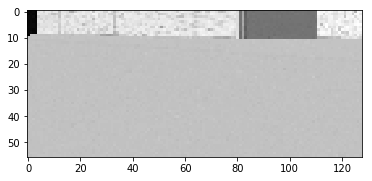

In [29]:
plt.imshow(np.flip(states_stacked, axis=1)[:,:,0], cmap='gray')

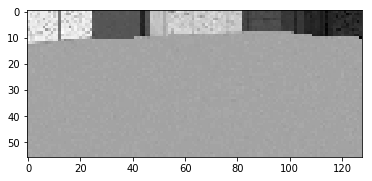

In [5]:
src = cv2.cvtColor(img[200:,:], cv2.COLOR_RGB2GRAY)
img1 = cv2.resize(src, None, fx = 0.2, fy = 0.2, interpolation = cv2.INTER_LINEAR )
plt.imshow(img1, cmap='gray')

In [10]:
next_state = deque(maxlen=4)
next_state.append(img1)
next_state.append(img1)
next_state.append(img1)
next_state.append(img1)

In [20]:
test_state = deque(maxlen=10)
test_state.append((np.stack(next_state, axis=2)))
test_state.append((np.stack(next_state, axis=2)))                 
test_state.append((np.stack(next_state, axis=2)))                 
test_state.append((np.stack(next_state, axis=2)))                 
test_state.append((np.stack(next_state, axis=2)))                 
test_state.append((np.stack(next_state, axis=2)))
np.array(test_state, dtype=np.float32).shape


(6, 56, 128, 4)

In [311]:
sample_batch_size = 6
actions, states, next_states, rewards, terminates = memory.sample(sample_batch_size)
not_done = np.invert(terminates)
not_done_pred = model.predict(next_states[not_done]).max(axis=1)
rewards[not_done]+= 0.9 * not_done_pred
target = model.predict(states)
target[np.arange(sample_batch_size), actions] = rewards

1


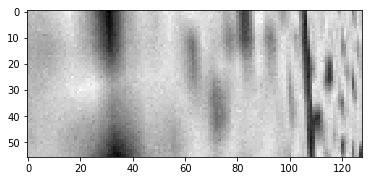

In [233]:
a = np.argmax(model.predict(np.expand_dims(np.stack(next_state, axis=2), axis=0))[0])
print(a)
img, reward, done, _ = env.step(a)

src = cv2.cvtColor(img[200:,:], cv2.COLOR_RGB2GRAY)
img1 = cv2.resize(src, None, fx = 0.2, fy = 0.2, interpolation = cv2.INTER_LINEAR )
next_state.append(img1)
plt.imshow(img1, cmap='gray')

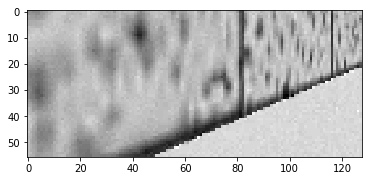

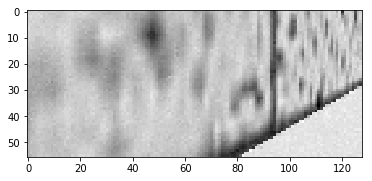

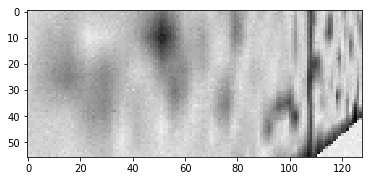

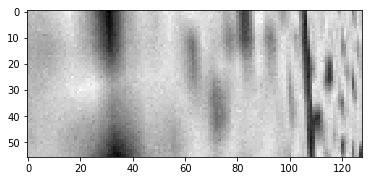

In [234]:
plt.figure()
plt.imshow(np.stack(next_state, axis=2)[:,:,0], cmap='gray')
plt.figure()
plt.imshow(np.stack(next_state, axis=2)[:,:,1], cmap='gray')
plt.figure()
plt.imshow(np.stack(next_state, axis=2)[:,:,2], cmap='gray')
plt.figure()
plt.imshow(np.stack(next_state, axis=2)[:,:,3], cmap='gray')

In [2]:
b = deque(maxlen=4)
b.append(img1)
b.append(img1)
b.append(img1)
b.append(img1)

h = np.expand_dims(np.stack(b, axis=2), axis=0)

NameError: name 'deque' is not defined

In [36]:
# import h5py
import numpy as np
import random

In [41]:
for i in np.random.choice([1], 2, False):
    print(i)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [450]:
m1 = H5Buffer((2,),10)
m1.append(np.array([1,2,3,4,5,6]))
m1.actions[:]

(0, ':', 6)
('curr idx', 6)


array([1, 2, 3, 4, 5, 6], dtype=uint8)

In [451]:
m1.append(np.array([0, 1,2,3,4,5,6,7,8]))
m1.actions[:]

(6, ':', 10)
('curr idx', 0)
(0, ':', 5)
('curr idx', 5)


array([4, 5, 6, 7, 8, 6, 0, 1, 2, 3], dtype=uint8)

In [458]:
m1.sample(0,m1.length())

(array([4, 5, 6, 7, 8, 6, 0, 1, 2, 3], dtype=uint8),)

In [448]:
m1.close()

In [38]:
img = preprocess(env.reset())
states = deque(maxlen=4)
for i in range(4):
    states.append(img)
    
data = np.stack(states, axis=2)
memory.append(0,data,data, 1.0, False)
memory.append(1,data,data, 2.0, True)              
memory.append(2,data,data, 3.0, True)              
memory.append(0,data,data, 4.0, False)              
memory.append(1,data,data, 5.0, True)              
memory.append(2,data,data, 6.0, False)              
memory.append(0,data,data, 7.0, True)              
memory.append(1,data,data, 8.0, False)              
memory.append(2,data,data, 9.0, True)              
memory.append(0,data,data, 10.0, True)              
memory.append(1,data,data, 11.0, False)              

[WARN] [1557336288.594101, 1.012000]: DONT RESET CONTROLLERS
[ERROR] [1557336288.623420, 1.035000]: SIMULATION RESET
[WARN] [1557336288.664027, 0.034000]: PUBLISHING REWARD...
[WARN] [1557336288.665069, 0.034000]: PUBLISHING REWARD...DONE=0,EP=3


In [39]:
actions, states, next_states, rewards, terminates = memory.sample(4)

(10, 56, 128, 4)


In [59]:
np.concatenate((states,next_states)).shape

(8, 56, 128, 4)

In [56]:
print(actions)
print(2-actions)

[0 0 2 1]
[2 2 0 1]


In [259]:
rewards[np.invert(terminates)]+= 1 + actions[np.invert(terminates)]

(4, 56, 128, 4)


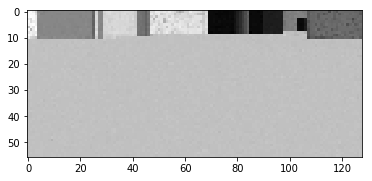

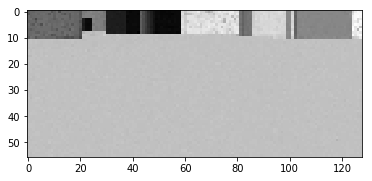

In [51]:
print(states.shape)
flipped = np.flip(states, axis=2)
plt.figure()
plt.imshow(states[0,:,:,0], cmap='gray')
plt.figure()
plt.imshow(flipped[0,:,:,0], cmap='gray')

In [6]:
i = 0
while True:
    i+=1
    next_state, reward, done, _ = env.step(1)
    if done:
        print(i)
        i = 0
        env.reset()
# plt.imshow(next_state)


241


[WARN] [1557068958.285627, 1.803000]: DONT RESET CONTROLLERS
[ERROR] [1557068958.335423, 1.848000]: SIMULATION RESET
[WARN] [1557068958.374252, 0.034000]: PUBLISHING REWARD...
[WARN] [1557068958.375455, 0.034000]: PUBLISHING REWARD...DONE=-1427.4348527288437,EP=1


204


[WARN] [1557068961.291149, 1.675000]: DONT RESET CONTROLLERS
[ERROR] [1557068961.338824, 1.718000]: SIMULATION RESET
[WARN] [1557068961.378394, 0.034000]: PUBLISHING REWARD...
[WARN] [1557068961.379441, 0.034000]: PUBLISHING REWARD...DONE=-1298.3722343444824,EP=2


194


[WARN] [1557068964.272444, 1.626000]: DONT RESET CONTROLLERS
[ERROR] [1557068964.321323, 1.671000]: SIMULATION RESET
[WARN] [1557068964.362593, 0.034000]: PUBLISHING REWARD...
[WARN] [1557068964.363811, 0.034000]: PUBLISHING REWARD...DONE=-1269.7888823151588,EP=3


KeyboardInterrupt: 

In [3]:
print(degree_to_ray(np.array([-90, 90]), 1081, -2.3561944902, 2.3561944902))
print(ray_to_degree(180, 1081, -2.3561944902, 2.356194490))
print(ray_to_rad(180, 1081, -2.3561944902, 2.356194490))
ray_to_rad(175, 1081, -2.3561944902, 2.356194490)-ray_to_rad(185, 1081, -2.3561944902, 2.356194490)

[901 180]
90.0416281185802
1.5715228745255319


0.043592867531914825

<Container object of 1 artists>

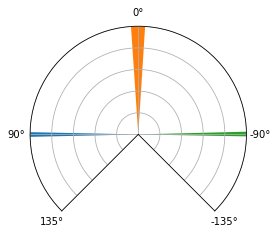

In [149]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.ylim(0, 1)
ax.set_thetamin(pr.min_a*180/np.pi)
ax.set_thetamax(pr.max_a*180/np.pi)
ax.set_theta_offset(np.pi/2)
ax.set_xticks([pr.max_a, 90*np.pi/180, 0, -90*np.pi/180, pr.min_a])

r = pr.ray_to_rad(180) 
rw = pr.ray_to_rad(185)-pr.ray_to_rad(175)

c = pr.ray_to_rad(540)
cw = pr.ray_to_rad(555)-pr.ray_to_rad(525)

l = pr.ray_to_rad(900)
lw = pr.ray_to_rad(905)-pr.ray_to_rad(895)

# ax.plot(np.full(2,ray_to_rad(180, 1081, -2.3561944902, 2.356194490)),y)
ax.bar([r],[1], width=rw)
ax.bar([c],[1], width=cw)
ax.bar([l],[1], width=lw)


In [101]:
np.full(2,1)

array([1, 1])